In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix


In [2]:
#load the Iris dataset
from sklearn.datasets import load_iris
iris= load_iris()

In [58]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [61]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
# Create a DataFrame from the Iris data
df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
df['target'] = iris["target"]

# Calculate the correlation between features and the target variable
correlation_cal = df.corr()['target'].abs().sort_values(ascending=False)

# Print the sorted correlation values
print(correlation_cal)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)     0.426658
Name: target, dtype: float64


binomial/binary (iris virginica or not)

In [4]:
#slpit the data into training and testing sets
X=iris["data"][:,3:] #petal width
y=(iris["target"]==2).astype(np.int64) # target==2 means we are choosing Iris Virginica and astype(np.int64) means it will give 0 or 1 where 1 if Iris Virginica, else 0


# if you want to make prediction on all target variables (i.e. setosa,versicolor,virginica)
# then use 
# y = iris["target"]

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [39]:
# Create  logistic regression classifier
clf = LogisticRegression()

In [40]:
# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the train set
y_pred_train = clf.predict(X_train)


In [41]:
#claculate the accuracy
accuracy = accuracy_score(y_train,y_pred_train)
print(accuracy)

0.9464285714285714


array([1, 0], dtype=int64)

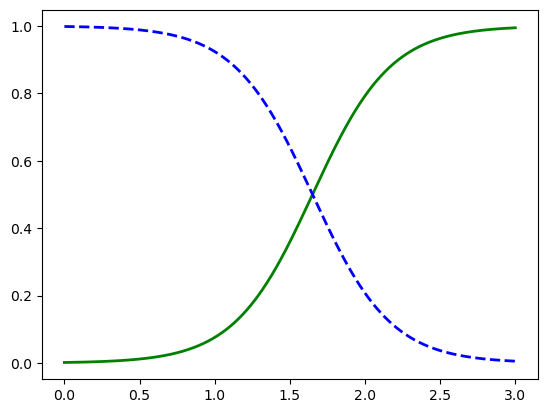

In [43]:

X_test = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = clf.predict_proba(X_test)

plt.plot(X_test, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_test, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

clf.predict([[1.7], [1.5]])

multinomial/Softmax

In [45]:
# For multinomial classification (Softmax), let's use all three classes
X_multi = iris["data"][:, (2, 3)]  # petal length, petal width
y_multi = iris["target"]

In [46]:
X_multi

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [47]:
y_multi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.25, random_state=42)

In [50]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train_multi, y_train_multi)

# Predict probabilities for a new sample
probabilities = softmax_reg.predict_proba([[5, 2]])
print("Probabilities for each class:", probabilities)

# Predict the class for a new sample
predicted_class = softmax_reg.predict([[5, 2]])
print("Predicted class:", predicted_class)

Probabilities for each class: [[1.09323752e-06 7.50621888e-02 9.24936718e-01]]
Predicted class: [2]


In [54]:
y_pred_multi = softmax_reg.predict(X_test_multi)

In [55]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test_multi, y_pred_multi, labels=[0,1,2])
cnf_matrix

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)